In data analytics, we often use ## Model Development ## to help us predict future observations from the data we have.

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

In [2]:
# import libraries

import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['scikit-learn'])
await piplite.install(['skillsnetwork','seaborn'])

In [6]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
! mamba install pandas ==1.3.3-y
! mamba install numpy=1.21.2-y
! mamba install sklearn=1.20.1-y

<class 'AttributeError'>: module 'pexpect' has no attribute 'TIMEOUT'

In [14]:
import pandas as pd
import numpy as mp
import skillsnetwork
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
# download dataset into your browser

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename,'wb') as f:
            f.write(await response.bytes())

In [16]:
# Download the dataset continued...

await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')

automobileEDA.csv: 100%|##########| 35648/35648 [00:00<00:00, 1018511.79it/s]


Saved as automobileEDA.csv


In [19]:
df = pd.read_csv('automobileEDA.csv', header =0)

In [22]:
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [23]:
df.tail(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,19,25,22625.0,12.368421,Medium,0,1


## Linear Regression 

### simple linear regression 
The predictor/independent variable (X)
The response/dependent variable (that we want to predict)(Y)


### Linear Fuction 

a refers to the intercept of the regression line, in other words: the value of Y when X is 0
b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

In [25]:
# loading the modules for linear regression 

from sklearn.linear_model import LinearRegression

In [28]:
# creating linear object

lm= LinearRegression()
lm

LinearRegression()

In [32]:
x = df[['highway-mpg']]
y = df['price']

In [33]:
# fitting the linear model using highway-mpg
lm.fit(x,y)

LinearRegression()

In [36]:
# output an predicition

Yhat=lm.predict(x)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [43]:
# What is the value of the intercept 

lm.intercept_

38423.30585815743

In [44]:
# what is the value of the slope

lm.coef_


array([-821.73337832])

#### The final estimated linear model 
#Yhat = a + bx 

Price = Intercept - coef *(highway-mpg)

# Question #1
Create a linear regression object called "lm1".

In [126]:
lm1 = LinearRegression()
lm1

LinearRegression()

Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [127]:

lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

Find the slope and intercept of the model?

In [128]:
#intercept 

lm.intercept_

-15806.62462632922

In [130]:
#slope

lm1.coef_

array([[166.86001569]])

What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

In [133]:
Yhat = -15806.62 + 116.86 *x
Yhat


,engine-size
0,-614.82
1,-614.82
2,1956.10
3,-3068.88
4,86.34
...,...
196,670.64
197,670.64
198,4410.16
199,1138.08


## Multiple Linear Regression

use other perdictors of price
- horsepower
- curb-weight
- engine-size
- highway-mpg

In [134]:
z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [135]:
#Fit the linear model using the four above-mentioned variables.
lm.fit(z,df['price'])

LinearRegression()

In [136]:
# find intercept
lm.intercept_

-15806.62462632922

In [137]:
# find coeffecient
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

## Question #2

In [144]:
# Create and train a Multiple Linear Regression model "lm2" where the response 
# variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

lm2 = LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']],df['price'])


LinearRegression()

In [147]:
#Find the coefficient of the model.

lm2.coef_

array([   1.49789586, -820.45434016])

## Model Evaluation Using Visualization

In [148]:
# import the visualization package: seaborn

import seaborn as sns
%matplotlib inline

### Regression Plot

 This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

(0.0, 48168.743085298745)

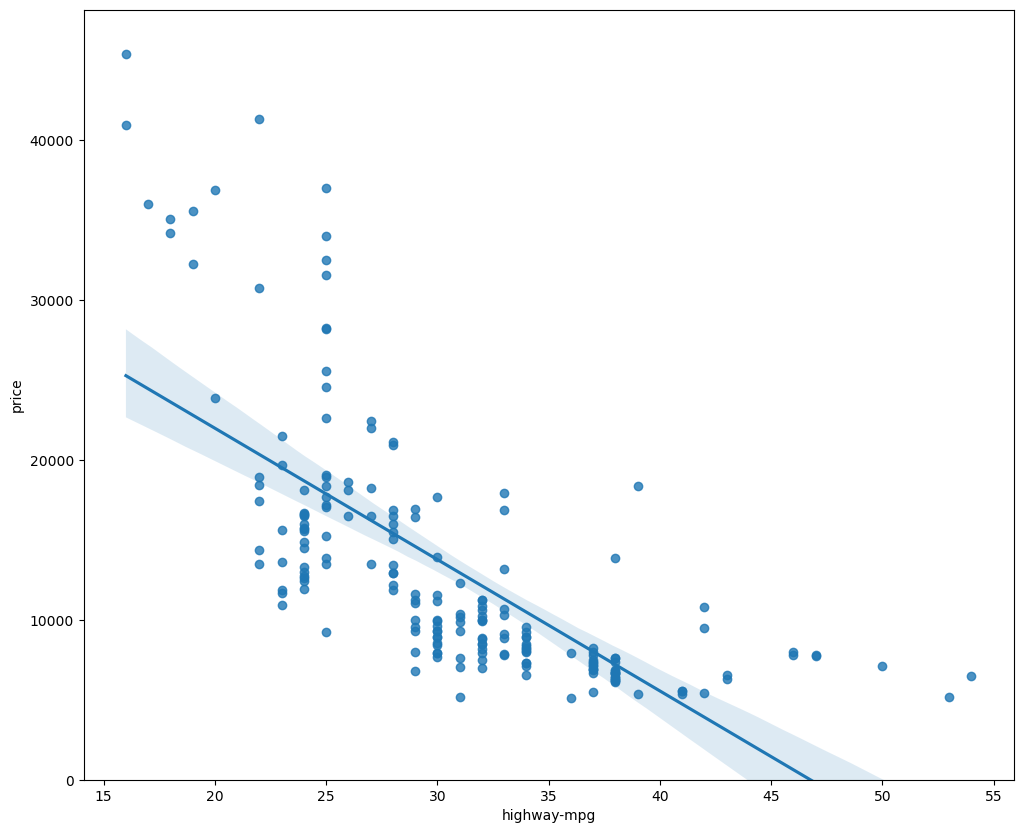

In [150]:
width =12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

(0.0, 47414.1)

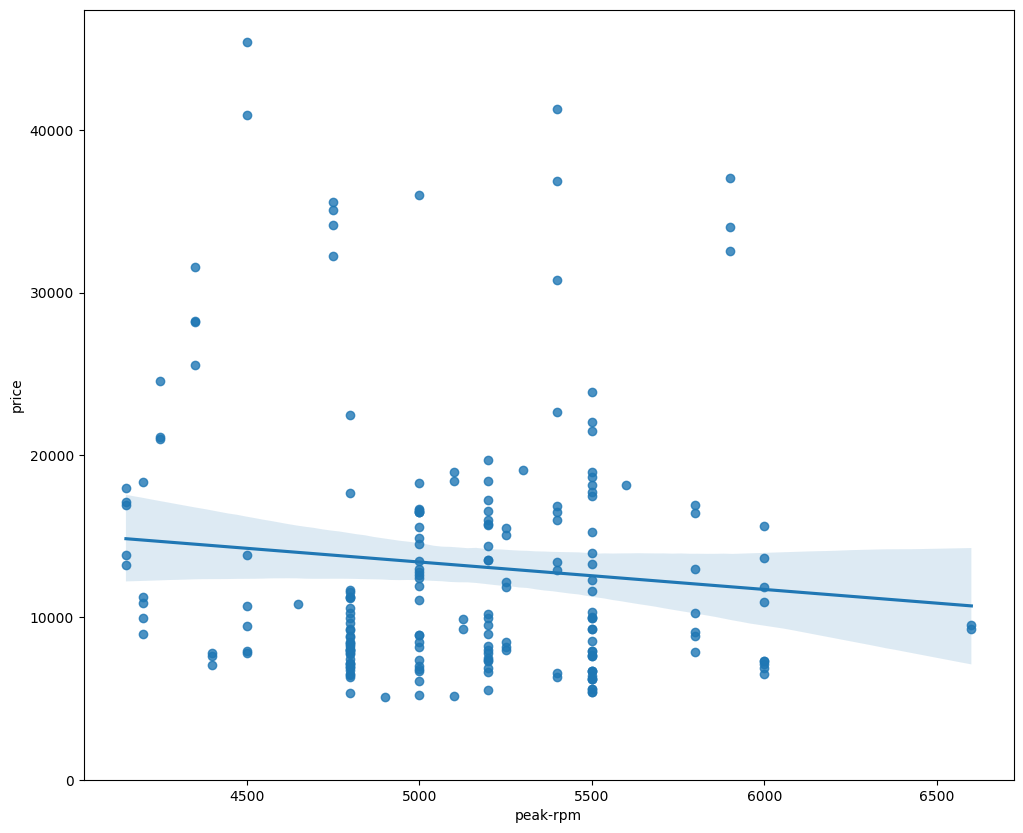

In [151]:
plt.figure(figsize = (width,height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

## Question #3

Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [169]:
df[['highway-mpg','peak-rpm','price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


## Residual Plot

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

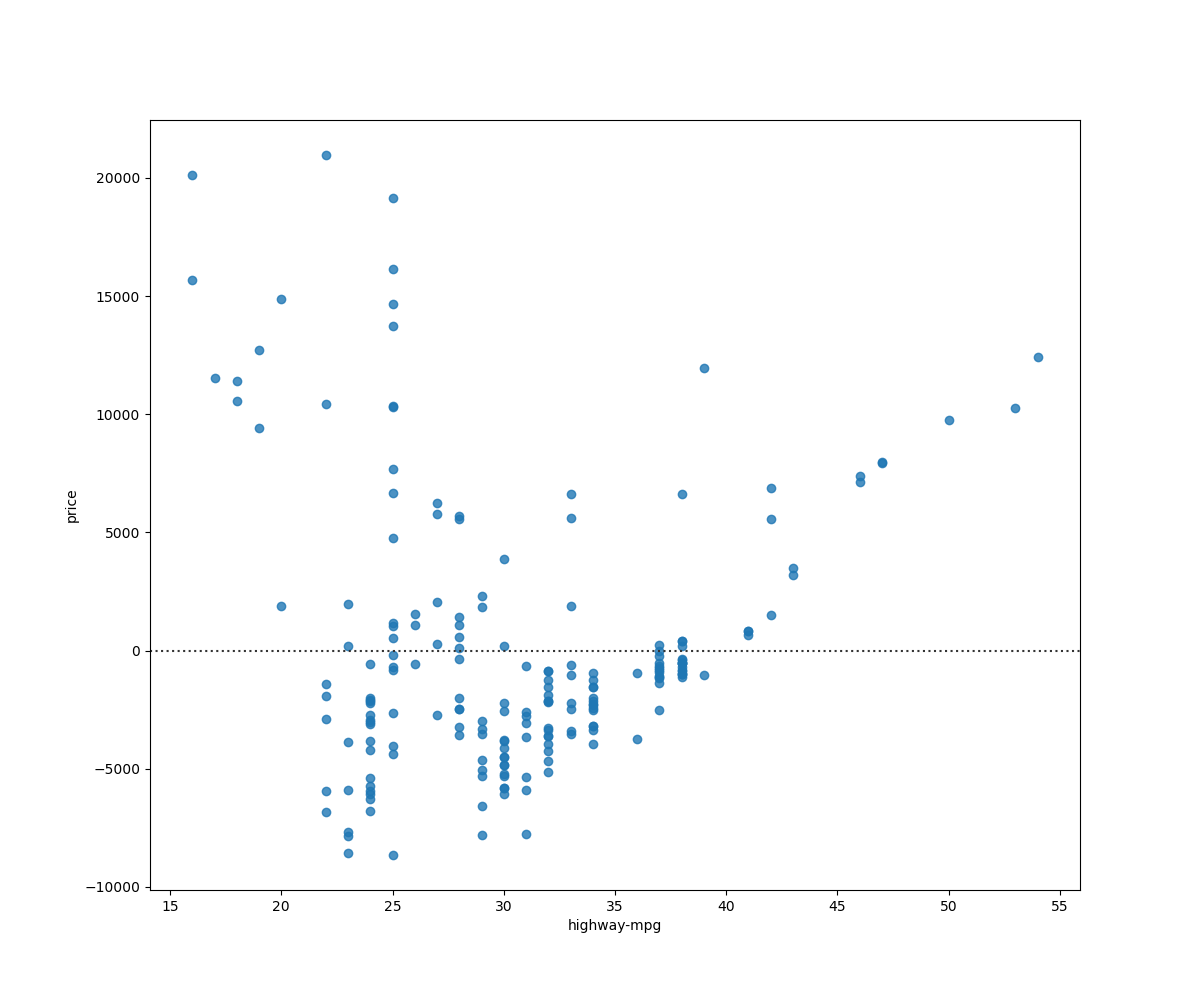

<Figure size 1200x1000 with 0 Axes>

In [172]:
# same syntax as regplot

width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

## Multiple Linear Regression 

In [173]:
Y_hat = lm.predict(z)


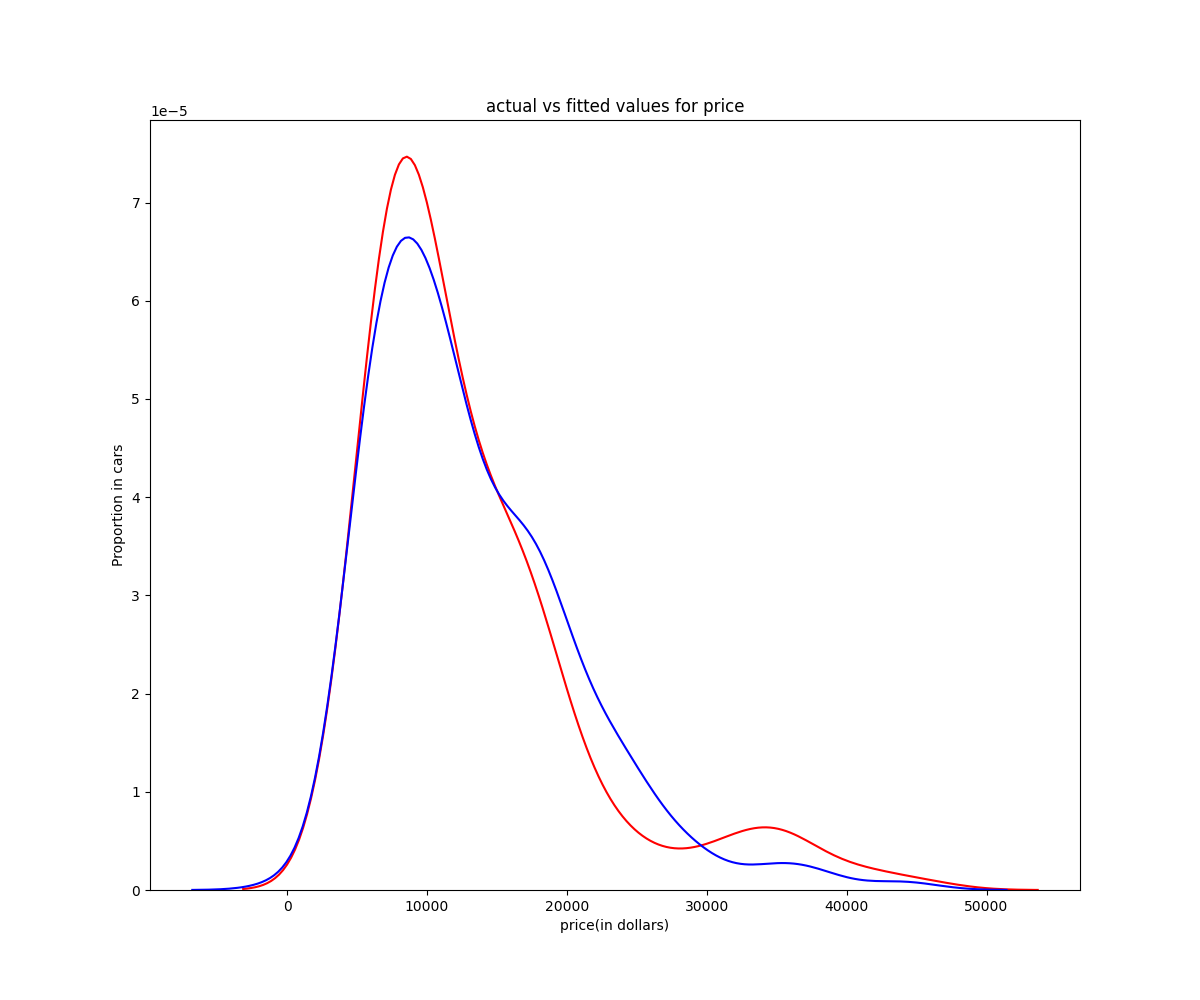

In [178]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('actual vs fitted values for price')
plt.xlabel('price(in dollars)')
plt.ylabel('Proportion in cars')

plt.show()
plt.close()

We can see the the values are reasonably close to the actual values since the two overlap.

##  Polynomial Regression and Pipelines

In [179]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [180]:
x =df['highway-mpg']
y =df['price']

In [184]:
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


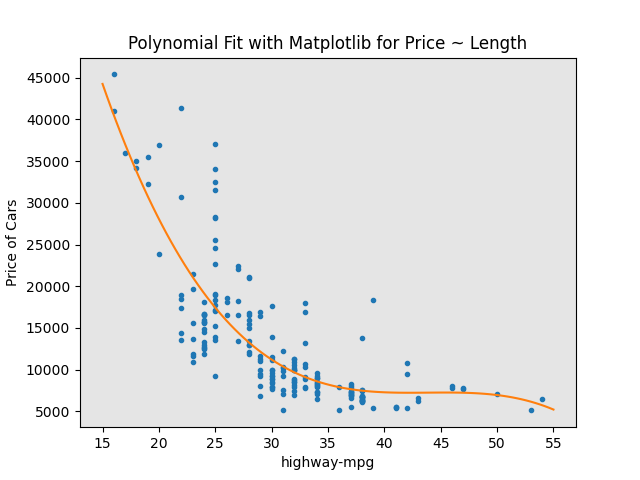

In [188]:
# plot the functions

PlotPolly(p,x,y,'highway-mpg')

In [189]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

## Question #4

create 11 order polymnomial model wiht the variables x and y from above.

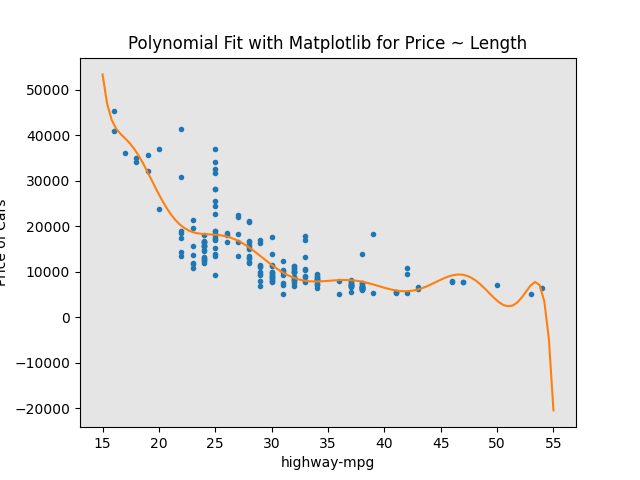

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


In [192]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
PlotPolly(p1, x, y, 'highway-mpg')
print(p1)

In [193]:
#Polynomial transform or multiple features

from sklearn.preprocessing import PolynomialFeatures

In [195]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [197]:
z_pr =pr.fit_transform(z)

In [198]:
z.shape

(201, 4)

In [200]:
z_pr.shape

(201, 15)

## Pipeline

use the pipleine to create a pipeline. Use standardscaler in a step for the pipeline  including the name of the model or estimator and its corresponding constructor.

In [202]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [207]:
# We create the pipeline by creating a list of tuples including 
# the name of the model or estimator and its corresponding constructor.

input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), 
         ('model', LinearRegression())]

In [208]:
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously.

In [209]:
z =z.astype(float)
pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [210]:
ypipe = pipe.predict(z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

## Question #5:
Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [214]:
input=[('scale', StandardScaler()),('model', LinearRegression())]
pipe=Pipeline(input)
pipe.fit(z,y)
ypipe=pipe.predict(z)
ypipe[0:4]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015])

## Measures for In-Sample Evaluation

-R^2 / R-squared
-Mean Squared Error (MSE)

In [224]:
# calculate R^2

lm.fit(X,y)
# Find the R^2
print('The R-square is: ', lm.score(X,y))

The R-square is:  0.4965911884339176


In [228]:
# predict the output (yhat) using the predict methos where X is the input variable
That = lm.predict(X)
print( 'the output of the first four Predicted value is:',Yhat[0:4])

the output of the first four Predicted value is:    engine-size
0      -614.82
1      -614.82
2      1956.10
3     -3068.88


In [229]:
# import the MSE(Mean squared error)

from sklearn.metrics import mean_squared_error

In [230]:
mse = mean_squared_error(df['price'], Yhat)
print( 'The mean square error of price and predicred value is:', mse)

The mean square error of price and predicred value is: 220587797.97794828


In [232]:
# Calculate R^2 with multiple linear regression

#fit the model
lm.fit(z,df['price'])
print('The r-square is:', lm.score(z,df['price']))

The r-square is: 0.8093562806577457


In [237]:
# calculate mse and product the prediction

Y_predict_multifit = lm.predict(z)
print('the mean square error of price and oredicted value using multifit is: ',\
      mean_squared_error(df['price'], Y_predict_multifit))

the mean square error of price and oredicted value using multifit is:  11980366.87072649


## Polynomial Fit

calculate R^2 and import the fnunction r2-score from the module metrics

In [241]:
from sklearn.metrics import r2_score

In [247]:
r_squared = r2_score(y, p(x))
r_squared

0.674194666390652

In [246]:
# MSE Calculating the MSE

mean_squared_error(df['price'],p(x))

20474146.426361218

### Prediction
In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [248]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

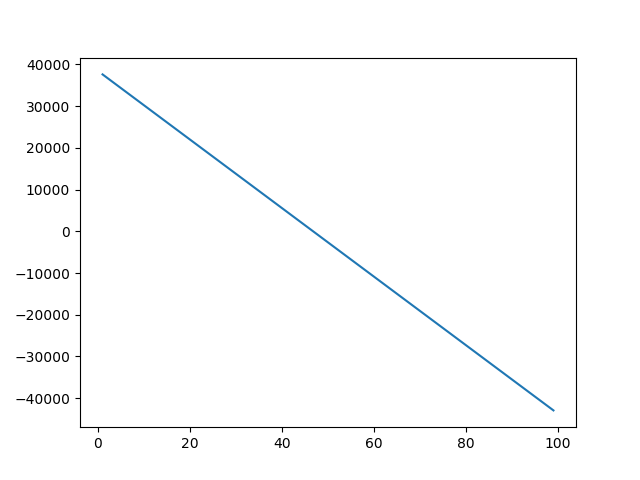

<Figure size 640x480 with 0 Axes>

In [252]:
new_input = np.arange(1,100,1).reshape(-1,1)
lm.fit(X,y)
Yhat = lm.predict(new_input)
plt.plot(new_input, Yhat)
plt.show()

Decision Making: Determining a Good Model Fit
Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

## Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

## Simple Linear Model (SLR) vs. Polynomial Fit
MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

## Multiple Linear Regression (MLR) vs. Polynomial Fit
MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.
Conclusion
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.